In [62]:
import numpy as np 
import matplotlib.pyplot as plt
import lin_Fit as lf
import pandas as pd
from lib5 import quad, getV

# Estrarre $\frac{1}{a_i}$

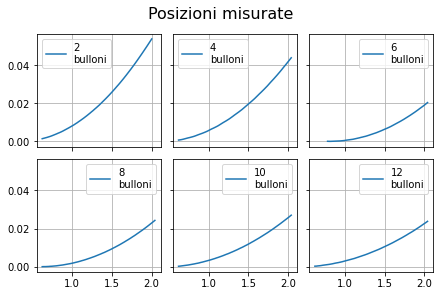

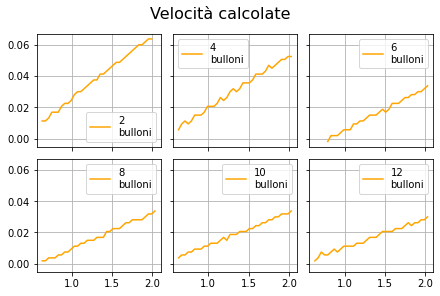

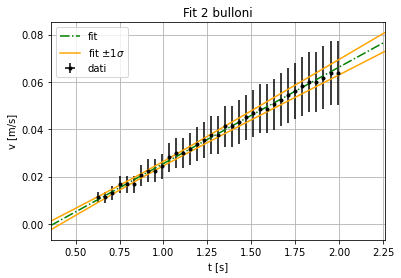

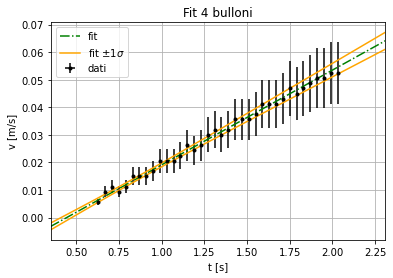

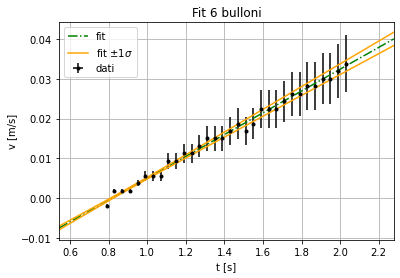

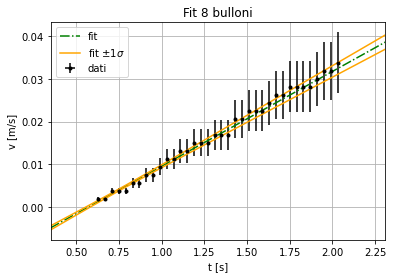

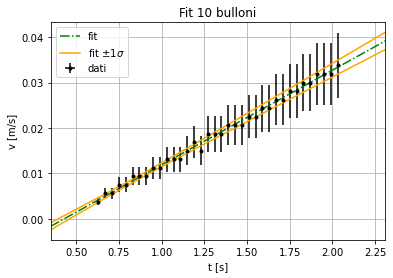

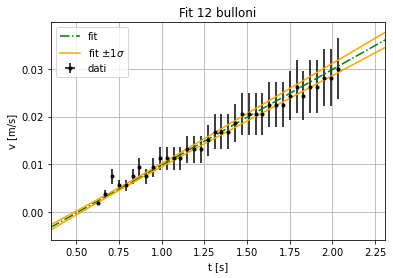

In [63]:
#setup grafici
fig1,ax1 = plt.subplots(2,3,constrained_layout=True,sharex=True, sharey=True)
fig2,ax2 = plt.subplots(2,3,constrained_layout=True,sharex=True, sharey=True)
line = 0

#setup analisi
limits = np.array([[30,30,38,30,30,30],
                   [100,102,102,102,102,102]])
a = np.arange(6.0)
sigma_a = np.arange(6.0)
sigma_x = 0.3*(10**-7)
sigma_t = 0.3*(10**-2)

#ciclo for
for i in range(6):
    name = 'data/completa'+str(i)+'.txt'
    df = pd.read_csv(name, sep = '\t', skiprows=1)
    t = df['Time (s)'].to_numpy()
    x = df['Position (m)'].to_numpy()
    x = x[limits[0][i]:limits[1][i]]
    t = t[limits[0][i]:limits[1][i]]
    
    v = np.arange(x.size/2)
    sigma_v = np.arange(x.size/2)
    tau = np.arange(x.size/2)
    sigma_tau = np.arange(x.size/2)
    
    for j in range(int(x.size/2)):
        #v[j] = (x[2*j+1]-x[2*j])/(t[2*j+1]-t[2*j])
        v[j], sigma_v[j] = getV(x[2*j+1],x[2*j],t[2*j+1],t[2*j], sigma_x, sigma_x, sigma_t, sigma_t) 
        tau[j] = (t[2*j+1]+t[2*j])/2
        sigma_tau[j] = quad(sigma_t, sigma_t)*0.5
        
    m0 = (v[v.size-1]-v[0])/(tau[tau.size-1]-tau[0])
    plt.figure()
    a[i], sigma_a[i], c, sigma_c, cov, rho = lf.lin_fit(tau,v, sigma_v, sigma_tau, m0, 
                                                        plot=True, verbose = False, 
                                                        title='Fit '+str((i+1)*2)+' bulloni',
                                                        xlabel = 't [s]', ylabel='v [m/s]')
    
    
    
    #plotting
    if (i == 3): 
        line = 1
    ax1[line][i%3].plot(t,x, label = str((i+1)*2)+'\nbulloni')
    ax1[line][i%3].legend()
    ax1[line][i%3].grid()
    
    ax2[line][i%3].plot(tau,v, label = str((i+1)*2)+'\nbulloni', color='orange')
    ax2[line][i%3].legend()
    ax2[line][i%3].grid()
    

fig1.suptitle('Posizioni misurate', fontsize = 16)
fig2.suptitle('Velocità calcolate', fontsize = 16)
fig1.savefig('fig5b/posizioni.pdf')
fig2.savefig('fig5b/velocità.pdf')

Text(0.5, 0.98, 'Risultati del fit')

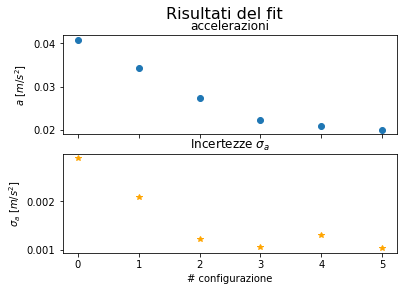

In [64]:
fig3, ax3 = plt.subplots(2, sharex = True)
ax3[0].plot(a, 'o')
ax3[0].set_title('accelerazioni')
ax3[0].set_ylabel('$a~[m/s^2]$')
ax3[1].plot(sigma_a, '*', color = 'orange')
ax3[1].set_title('Incertezze $\sigma_a$',)
ax3[1].set_ylabel('$\sigma_a~[m/s^2]$')
plt.xlabel('# configurazione')

fig3.suptitle('Risultati del fit', fontsize=16)

# Propagazione delle incertezze

In [65]:
import sympy as sp
v, x2,x1, t1,t2,sigma_v,sigma_x1,sigma_x2, sigma_t1, sigma_t2 = sp.symbols('v, x2,x1, t1,t2,sigma_v,sigma_x1,sigma_x2, sigma_t1, sigma_t2')
v = (x2-x1)/(t2-t1)
sigma_v = quad(sp.diff(v,x2)*sigma_x2,
               sp.diff(v,x1)*sigma_x1,
               sp.diff(v,t2)*sigma_t2,
               sp.diff(v,t1)*sigma_t1)
sigma_v

(sigma_t1**2*(-x1 + x2)**2/(-t1 + t2)**4 + sigma_t2**2*(-x1 + x2)**2/(-t1 + t2)**4 + sigma_x1**2/(-t1 + t2)**2 + sigma_x2**2/(-t1 + t2)**2)**0.5